In [1]:
import matplotlib.pylab as plt
%matplotlib inline
import scipy as sp
import numpy as np
import scipy.optimize as opt
from odbcAccess import *

In [2]:
db=expODBC(r'd:\work\NIIM\db-work.accdb')

In [3]:
exp=db.getExperimentData('t633-01')
p=unpackTable(exp['ИмпульсыОбработанные'])

In [4]:
def syncPulses(p):
    tmax=p[0][-1]
    emax=max(p[1][0])
    ref=lambda t: np.interp(t, p[0], p[1][1])
    tr=lambda t: np.interp(t, p[0], p[1][2])
    def residual(params):
        dtref, dttr, dyref = params
        return ((p[1][0]-(ref(p[0]-dtref)+dyref)-tr(p[0]-dttr))**2).sum()
    #r=opt.fmin(residual,  (tmax/10, tmax/10, emax/10), ftol=1e-6, xtol=1e-8)
    r=opt.differential_evolution(residual, bounds=((-tmax/3, tmax/3), (-tmax/3, tmax/3), (-emax/10, emax/10)))
    return p[0], [p[1][0], ref(p[0]-r.x[0])+r.x[2], tr(p[0]-r.x[1])]

In [5]:
r=syncPulses(p)

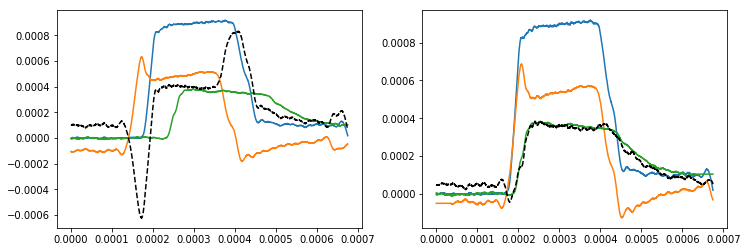

In [6]:
plt.figure(figsize=(12,4))
plt.subplot(121)
for i in range(3):
    plt.plot(p[0], p[1][i])
plt.plot(p[0], p[1][0]-p[1][1], '--k')
plt.subplot(122)
for i in range(3):
    plt.plot(r[0], r[1][i])
plt.plot(r[0], r[1][0]-r[1][1], '--k')

In [7]:
r.x

AttributeError: 'tuple' object has no attribute 'x'